<a href="https://colab.research.google.com/github/CeSaRLoPeZArTeAgA/EDO_Aplicadas-IMCA/blob/main/RKF_EDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAESTRIA DE MODELIZACION MATEMATICA Y COMPUTACIONAL
---
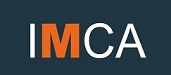


---


# CLASE: Metodo Adaptativo Runge Kutta Fehlbert

# Metodo Runge - Kutta - Fehlberg para EDO

Sea el problema de valor inicial(PVI):

$$   y=f(t,y) $$
con
$y(a)=\alpha$  y  $a<t<b$


Donde $f$ una funcion Lipschitziana en la variable $y$. El método consiste en lo siguiente iteracion:

$$w_{i+1}=w_{i}+\frac{25}{216}K_{1}+\frac{1408}{2565}K_{3}+\frac{2197}{4104}K_{4}-\frac{1}{5}K_{5} $$

Donde:
* $K_{1}=hf(t_{i},w_{i})$
* $K_{2}=hf(t_{i}+ \frac{1}{4}h,w_{i}+\frac{1}{4}K_{1})$
* $K_{3}=hf(t_{i}+\frac{3}{8}h,w_{i}+\frac{3}{32}K_{1}+\frac{9}{32}K_{2})$
* $K_{4}=hf(t_{i}+\frac{12}{13}h,w_{i}+\frac{1932}{2197}K_{1}-\frac{7200}{2197}K_{2}+\frac{7296}{2197}K_{3})$
* $K_{5}=hf(t_{i}+h,w_{i}+\frac{439}{216}K_{1}-8K_{2}+\frac{3680}{513}K_{3}-\frac{845}{4104}K_{4})$
* $K_{6}=hf(t_{i}+\frac{1}{2}h,w_{i}-\frac{8}{27}K_{1}+2K_{2}-\frac{3544}{2565}K_{3}+\frac{1859}{4104}K_{4}-\frac{11}{40}K_{5})$


In [33]:
#RUNGE KUTTA FELBERG - EDO
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#definicion de la funcion f
def f(t,y):
  return y-t**2+1
#Metodo de RK
def RKF(a,b,y0,f):
  """
  Implementacion metodo de RK4
  a--Inicio Intervalo
  b--Fin de Intervalo
  y0--Aproximacion Inicial
  f-funcion
  N--Pasos
  Salida
  w--aproximacion final
  """
  Tol=1e-5
  hmax=0.25
  hmin=0.01
  Y,T,K1,K2,K3,K4,K5,K6,H,R,D=[],[],[],[],[],[],[],[],[],[],[]
  #paso 1
  t=a
  w=y0
  h=hmax
  flag=1
  T+=[a]
  Y+=[w]
  K1+=[0]
  K2+=[0]
  K3+=[0]
  K4+=[0]
  K5+=[0]
  K6+=[0]
  H+=[0]
  R+=[0]
  D+=[0]
  print(f'Tiempo t={t}, solucion aproximada={w},paso={h}\n')
  while (flag==1):
    #paso 3
    H+=[h]
    k1=h*f(t,w)
    k2=h*f(t+h/4,w+k1/4)
    k3=h*f(t+3*h/8,w+3*k1/32+9*k2/32)
    k4=h*f(t+12*h/13,w+1932*k1/2197-7200*k2/2197+7296*k3/2197)
    k5=h*f(t+h,w+439*k1/216-8*k2+3680*k3/513-845*k4/4104)
    k6=h*f(t+h/2,w-8*k1/27+2*k2-3544*k3/2565+1859*k4/4104-11*k5/40)
    #paso 4
    r=np.abs((k1/360-128*k3/4275-2197*k4/75240+k5/50+2*k6/55))/h
    #paso 5
    if r<=Tol:
      #paso 6
      t=t+h
      w=w+25*k1/216+1408*k3/2565+2197*k4/4104-k5/5
      #paso 7
      print(f'Tiempo t={t}, solucion aproximada={w},paso={h}\n')
    #paso 8
    delta=0.84*(Tol/r)**(1/4)
    #paso 9
    if delta<=0.1:
      h=0.1*h
    else:
      if delta>=4:
        h=4*h
      else:
        h=delta*h
    #paso 10
    if h>=hmax:
      h=hmax
    #paso 11
    if t>=b:
      flag=0
    else:
      if t+h > b:
        h=b-t
      else:
        if h<hmin:
          flag=0
          print('valor minimo de h alcanzado\n')
          print('Procedimiento completado sin exito\n')
    Y+=[w]
    T+=[t]
    K1+=[k1]
    K2+=[k2]
    K3+=[k3]
    K4+=[k4]
    K5+=[k5]
    K6+=[k6]
    R+=[r]
    D+=[delta]
  #paso 12
  print('Proceso Terminado\n')
  return T,Y,K1,K2,K3,K4,K5,K6,H,R,D

In [34]:
# Definicion de la funcion solucion Y
def ff(T):
  y_real=[]
  for t in T:
    y_real+=[(t+1)**2-0.5*np.exp(t)]
  return y_real

Tiempo t=0, solucion aproximada=0.5,paso=0.25

Tiempo t=0.25, solucion aproximada=0.9204886020758213,paso=0.25

Tiempo t=0.4865522022847686, solucion aproximada=1.3964910142883942,paso=0.23655220228476856

Tiempo t=0.7293331998423019, solucion aproximada=1.9537487871541541,paso=0.24278099755753335

Tiempo t=0.9793331998423019, solucion aproximada=2.586426014741981,paso=0.25

Tiempo t=1.2293331998423018, solucion aproximada=3.2604605104787123,paso=0.25

Tiempo t=1.4793331998423018, solucion aproximada=3.952095537283882,paso=0.25

Tiempo t=1.7293331998423018, solucion aproximada=4.630826819537572,paso=0.25

Tiempo t=1.9793331998423018, solucion aproximada=5.257486064559507,paso=0.25

Tiempo t=2.0, solucion aproximada=5.305489627368784,paso=0.020666800157698173

Proceso Terminado

          t       w_i        K1        K2        K3        K4        K5  \
0  0.000000  0.500000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.250000  0.920489  0.375000  0.397461  0.409538  0.458497

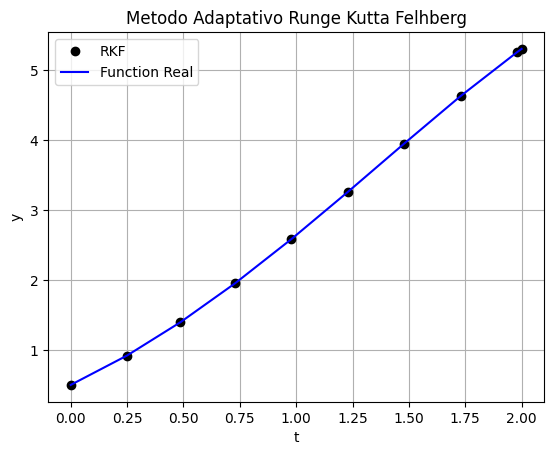

In [36]:
#RKF
tr,yr,K1,K2,K3,K4,K5,K6,H,R,D=RKF(0,2,0.5,f)
yv=ff(tr)
datos={'t':tr,'w_i':yr1,'K1':K1,'K2':K2,'K3':K3,'K4':K4,'K5':K5,'K6':K6,'h':H,'R':R,'Delta':D}
df1=pd.DataFrame(datos)
print(df1)

plt.plot(tr,yr,'ok')
plt.plot(tr,yv,'b')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Metodo Adaptativo Runge Kutta Felhberg')
plt.legend(['RKF','Function Real'])
plt.show()